In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Define the file path and load the dataset
file_path = '/content/Software Engineer Salaries.csv'  # Adjust the path if necessary
df = pd.read_csv(file_path)

# Step 4: Print column names and preview data
print("Column names in the dataset:", df.columns)
print(df.head())  # Preview the first few rows of the dataset

# Step 5: Define a function to clean salary values
def clean_salary(salary):
    if isinstance(salary, str):
        # Extract numeric range from salary strings like "$68K - $94K (Glassdoor est.)"
        salary = salary.lower().replace('k', '000')
        salary_range = salary.split('-')
        try:
            # Calculate the average of the range
            low = int(''.join(filter(str.isdigit, salary_range[0])))
            high = int(''.join(filter(str.isdigit, salary_range[1])))
            return (low + high) // 2  # Return the average salary
        except (IndexError, ValueError):
            return np.nan  # Handle non-convertible cases as NaN
    return salary

# Step 6: Apply the function to clean the 'Salary' column
df['Salary'] = df['Salary'].apply(clean_salary)

# Step 7: Fill missing salary values with the median of existing salaries
median_salary = df['Salary'].median()
df['Salary'] = df['Salary'].fillna(median_salary)

# Step 8: Save the cleaned dataset back to Google Drive
output_path = '/content/Cleaned_Software_Engineer_Salaries.csv'
df.to_csv(output_path, index=False)

print(f"Cleaned file saved to {output_path}")


Column names in the dataset: Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date', 'Salary'], dtype='object')
                         Company  Company Score  \
0                       ViewSoft            4.8   
1                        Workiva            4.3   
2     Garmin International, Inc.            3.9   
3                       Snapchat            3.5   
4  Vitesco Technologies Group AG            3.1   

                                           Job Title         Location Date  \
0                                  Software Engineer     Manassas, VA   8d   
1                          Software Support Engineer           Remote   2d   
2                               C# Software Engineer         Cary, NC   2d   
3  Software Engineer, Fullstack, 1+ Years of Expe...  Los Angeles, CA   2d   
4                                  Software Engineer       Seguin, TX   2d   

                          Salary  
0   $68K - $94K (Glassdoor est.)  
1   $61K - $104K (Employer est

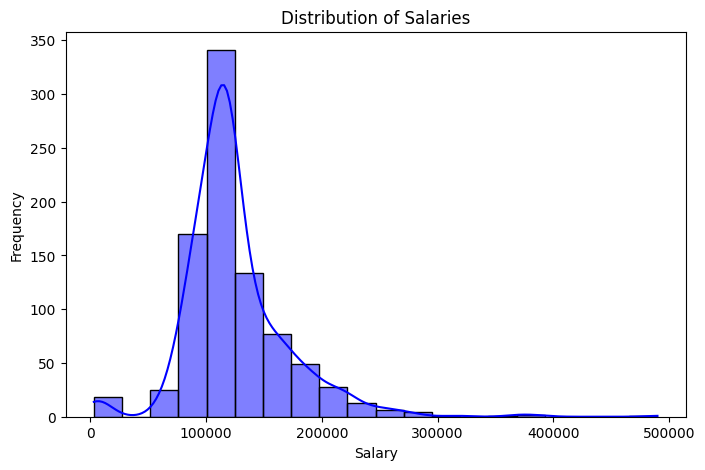

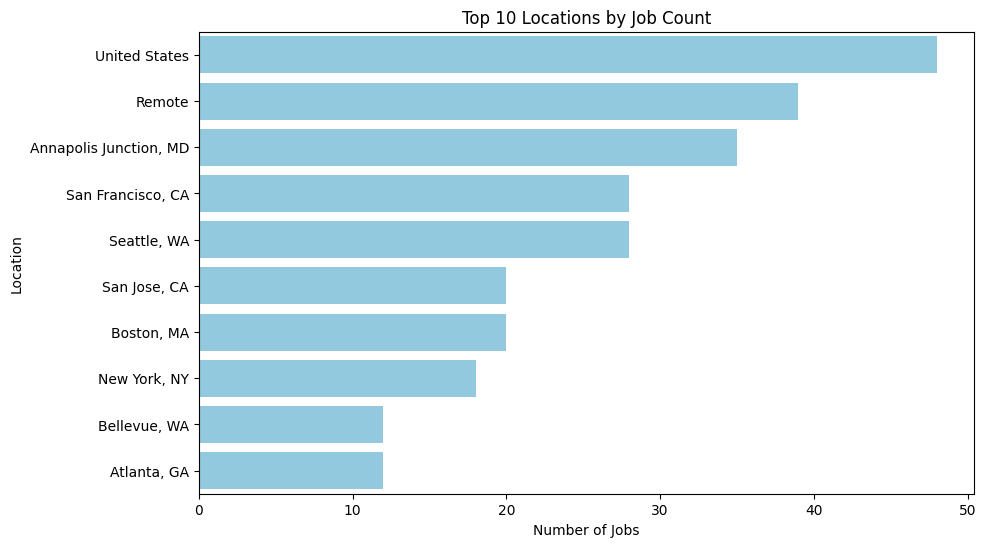

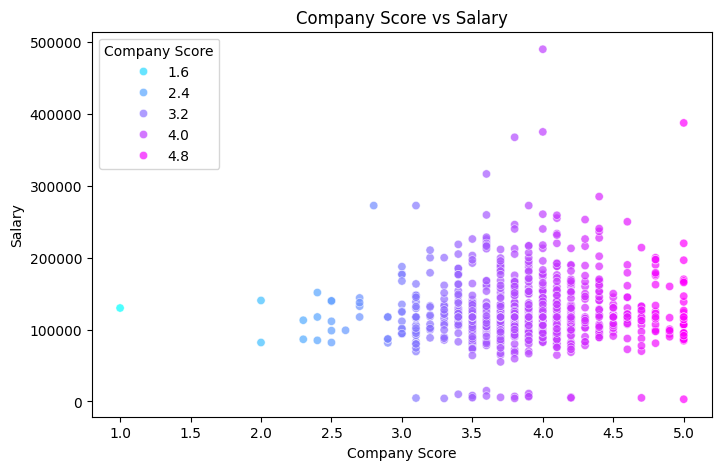

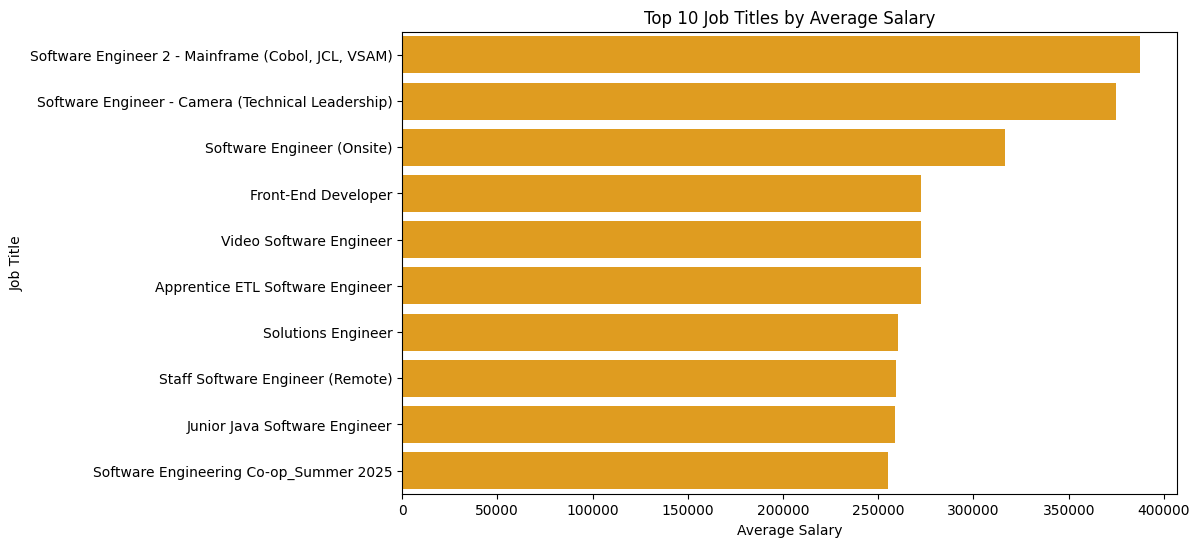

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = '/content/Cleaned_Software_Engineer_Salaries.csv'
df = pd.read_csv(file_path)

# Step 3: Distribution of Salaries
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=20, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Step 4: Top Locations by Job Count
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, orient="h", color="skyblue")
plt.title('Top 10 Locations by Job Count')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

# Step 5: Company Score vs. Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Company Score', y='Salary', hue='Company Score', palette='cool', alpha=0.7)
plt.title('Company Score vs Salary')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.show()

# Step 6: Average Salary by Job Title
avg_salary_by_title = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, orient="h", color="orange")
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()


In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         870 non-null    float64
dtypes: float64(2), object(4)
memory usage: 40.9+ KB


(                         Company  Company Score  \
 0                       ViewSoft            4.8   
 1                        Workiva            4.3   
 2     Garmin International, Inc.            3.9   
 3                       Snapchat            3.5   
 4  Vitesco Technologies Group AG            3.1   
 
                                            Job Title         Location Date  \
 0                                  Software Engineer     Manassas, VA   8d   
 1                          Software Support Engineer           Remote   2d   
 2                               C# Software Engineer         Cary, NC   2d   
 3  Software Engineer, Fullstack, 1+ Years of Expe...  Los Angeles, CA   2d   
 4                                  Software Engineer       Seguin, TX   2d   
 
      Salary  
 0   81000.0  
 1   82500.0  
 2  106500.0  
 3  121000.0  
 4   96500.0  ,
 None)

In [ ]:
np.sum(df.isna().sum())

96

In [ ]:
df.columns

Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date', 'Salary'], dtype='object')

In [ ]:
#recomendation system

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant job features into a single text field
df['Job_Features'] = df['Job Title'].astype(str) + " " + df['Location'].astype(str) + " " + df['Company'].astype(str)

# Vectorize job features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
job_vectors = tfidf.fit_transform(df['Job_Features'])

# Example user preference input
user_preference = "Data Scientist Remote Google"

# Vectorize the user preference
user_vector = tfidf.transform([user_preference])

# Compute similarity scores between user preference and job listings
similarity_scores = cosine_similarity(user_vector, job_vectors)

# Add similarity scores to the dataset
df['Similarity_Score'] = similarity_scores[0]

# Recommend top 5 job listings
top_jobs = df.sort_values(by='Similarity_Score', ascending=False).head(5)
print("Top 5 Recommended Jobs:")
print(top_jobs[['Job Title', 'Location', 'Company', 'Salary', 'Similarity_Score']])


Top 5 Recommended Jobs:
                                   Job Title       Location  \
254              Sr Software Engineer - Data   Bellevue, WA   
194  Software Engineer (US Remote Available)         Remote   
560    Jr. Software Engineer - Hybrid/Remote         Remote   
811                 Senior Software Engineer     Irving, TX   
539      Software Engineer, Data Engineering  United States   

                        Company    Salary  Similarity_Score  
254                    M&T Bank  138000.0          0.394686  
194                      Splunk  117500.0          0.368464  
560                    Rippling   83500.0          0.362380  
811  Amazon Data Services, Inc.  117500.0          0.359146  
539         Clarity Innovations  117500.0          0.342532  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


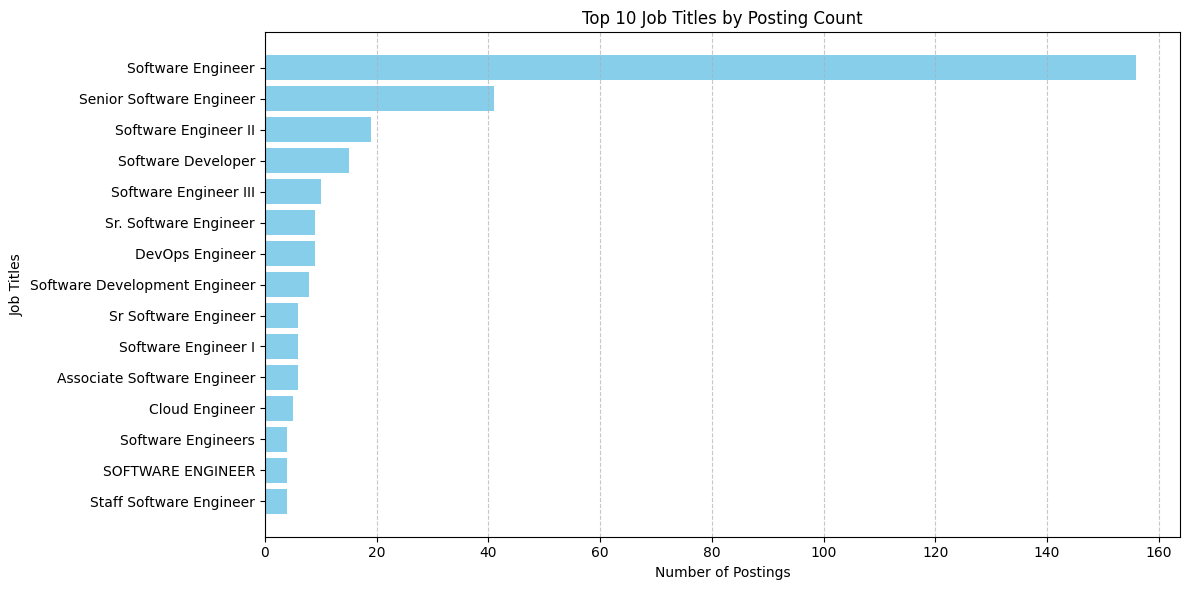

Top Job Titles by Total Posting Count:
                         Job Title  Count
314              Software Engineer    156
228       Senior Software Engineer     41
397           Software Engineer II     19
290             Software Developer     15
410          Software Engineer III     10
516          Sr. Software Engineer      9
70                 DevOps Engineer      9
301  Software Development Engineer      8
508           Sr Software Engineer      6
394            Software Engineer I      6
25     Associate Software Engineer      6
52                  Cloud Engineer      5
474             Software Engineers      4
205              SOFTWARE ENGINEER      4
521        Staff Software Engineer      4


In [ ]:
#only training

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Ensure the 'Days_Ago' column exists and process it
df['Days_Ago'] = df['Date'].str.extract(r'(\d+)').astype(float)
df['Posting_Date'] = pd.to_datetime('today') - pd.to_timedelta(df['Days_Ago'], unit='d')

# Group by Job Title and Posting_Date for analysis
trend_data = df.groupby([df['Posting_Date'].dt.to_period('W'), 'Job Title']).size().reset_index(name='Count')
trend_data['Posting_Date'] = trend_data['Posting_Date'].dt.to_timestamp()

# Aggregate data by date (sum of all job postings per week)
weekly_trend = trend_data.groupby('Posting_Date')['Count'].sum().reset_index()

# Add sequential days for linear regression
weekly_trend['Days'] = (weekly_trend['Posting_Date'] - weekly_trend['Posting_Date'].min()).dt.days

# Train Linear Regression
X = weekly_trend[['Days']]
y = weekly_trend['Count']
model = LinearRegression()
model.fit(X, y)

# Forecast for next 6 weeks
future_days = np.array([(weekly_trend['Days'].max() + i * 7) for i in range(1, 7)]).reshape(-1, 1)
forecast = model.predict(future_days)
forecast_dates = pd.date_range(start=weekly_trend['Posting_Date'].max() + pd.Timedelta(days=1), periods=6, freq='W')

# Display the top contributing job titles across all weeks
top_jobs = trend_data.groupby(['Job Title'])['Count'].sum().reset_index()
top_jobs = top_jobs.sort_values(by='Count', ascending=False).head(15)  # Top 15 job titles

# Plot the top job titles
plt.figure(figsize=(12, 6))
plt.barh(top_jobs['Job Title'], top_jobs['Count'], color='skyblue')
plt.title('Top 10 Job Titles by Posting Count')
plt.xlabel('Number of Postings')
plt.ylabel('Job Titles')
plt.gca().invert_yaxis()  # Reverse the order of job titles for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the top job titles
print("Top Job Titles by Total Posting Count:")
print(top_jobs)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error (MSE): 14641.0
R² Score: nan


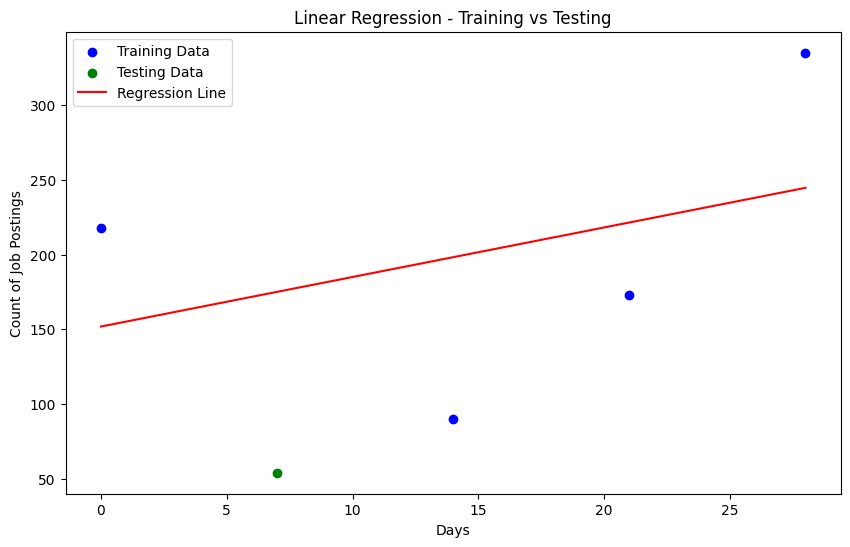

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Forecast for the next 6 weeks:
        Date  Forecasted Count
0 2024-12-01             267.8
1 2024-12-08             291.0
2 2024-12-15             314.2
3 2024-12-22             337.4
4 2024-12-29             360.6
5 2025-01-05             383.8


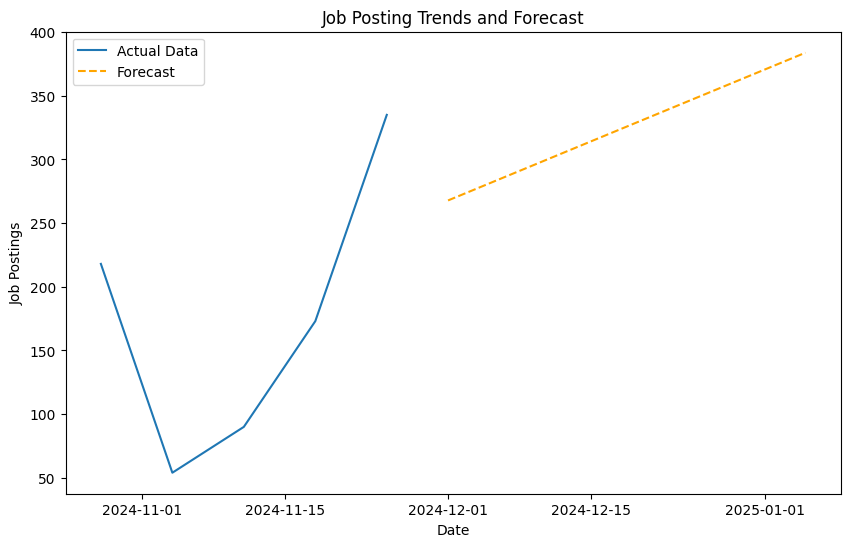

In [ ]:
#test and train on 80/20

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ensure the 'Days_Ago' column exists and process it
df['Days_Ago'] = df['Date'].str.extract(r'(\d+)').astype(float)
df['Posting_Date'] = pd.to_datetime('today') - pd.to_timedelta(df['Days_Ago'], unit='d')

# Group by Job Title and Posting_Date for analysis
trend_data = df.groupby([df['Posting_Date'].dt.to_period('W'), 'Job Title']).size().reset_index(name='Count')
trend_data['Posting_Date'] = trend_data['Posting_Date'].dt.to_timestamp()

# Aggregate data by date (sum of all job postings per week)
weekly_trend = trend_data.groupby('Posting_Date')['Count'].sum().reset_index()

# Add sequential days for linear regression
weekly_trend['Days'] = (weekly_trend['Posting_Date'] - weekly_trend['Posting_Date'].min()).dt.days

# Split data into training and testing sets
X = weekly_trend[['Days']]
y = weekly_trend['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot training and testing results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression - Training vs Testing')
plt.xlabel('Days')
plt.ylabel('Count of Job Postings')
plt.legend()
plt.show()

# Forecast for next 6 weeks
future_days = np.array([(weekly_trend['Days'].max() + i * 7) for i in range(1, 7)]).reshape(-1, 1)
forecast = model.predict(future_days)
forecast_dates = pd.date_range(start=weekly_trend['Posting_Date'].max() + pd.Timedelta(days=1), periods=6, freq='W')

# Display the forecast
forecast_results = pd.DataFrame({'Date': forecast_dates, 'Forecasted Count': forecast})
print("\nForecast for the next 6 weeks:")
print(forecast_results)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(weekly_trend['Posting_Date'], weekly_trend['Count'], label='Actual Data')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Job Posting Trends and Forecast')
plt.xlabel('Date')
plt.ylabel('Job Postings')
plt.legend()
plt.show()


Mean Squared Error (MSE): 7370.620000000001
R² Score: 0.2526848359492232


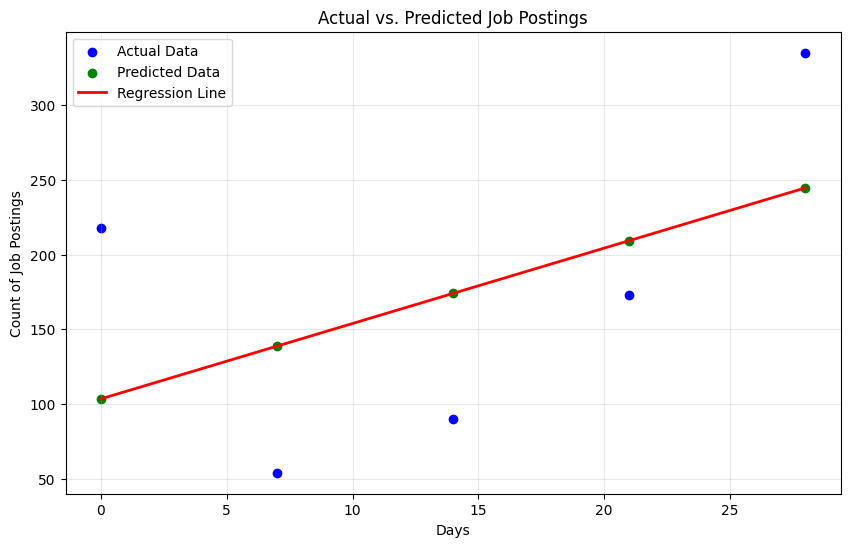

In [ ]:
#test train on same datadet

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Ensure the 'Days_Ago' column exists and process it
df['Days_Ago'] = df['Date'].str.extract(r'(\d+)').astype(float)
df['Posting_Date'] = pd.to_datetime('today') - pd.to_timedelta(df['Days_Ago'], unit='d')

# Group by Job Title and Posting_Date for analysis
trend_data = df.groupby([df['Posting_Date'].dt.to_period('W'), 'Job Title']).size().reset_index(name='Count')
trend_data['Posting_Date'] = trend_data['Posting_Date'].dt.to_timestamp()

# Aggregate data by date (sum of all job postings per week)
weekly_trend = trend_data.groupby('Posting_Date')['Count'].sum().reset_index()

# Add sequential days for linear regression
weekly_trend['Days'] = (weekly_trend['Posting_Date'] - weekly_trend['Posting_Date'].min()).dt.days

# Train Linear Regression on the entire dataset
X = weekly_trend[['Days']]
y = weekly_trend['Count']
model = LinearRegression()
model.fit(X, y)

# Predict using the entire dataset for testing
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(weekly_trend['Days'], y, color='blue', label='Actual Data')
plt.scatter(weekly_trend['Days'], y_pred, color='green', label='Predicted Data')
plt.plot(weekly_trend['Days'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual vs. Predicted Job Postings')
plt.xlabel('Days')
plt.ylabel('Count of Job Postings')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Mean Squared Error (MSE): 390.61
R² Score: 0.96


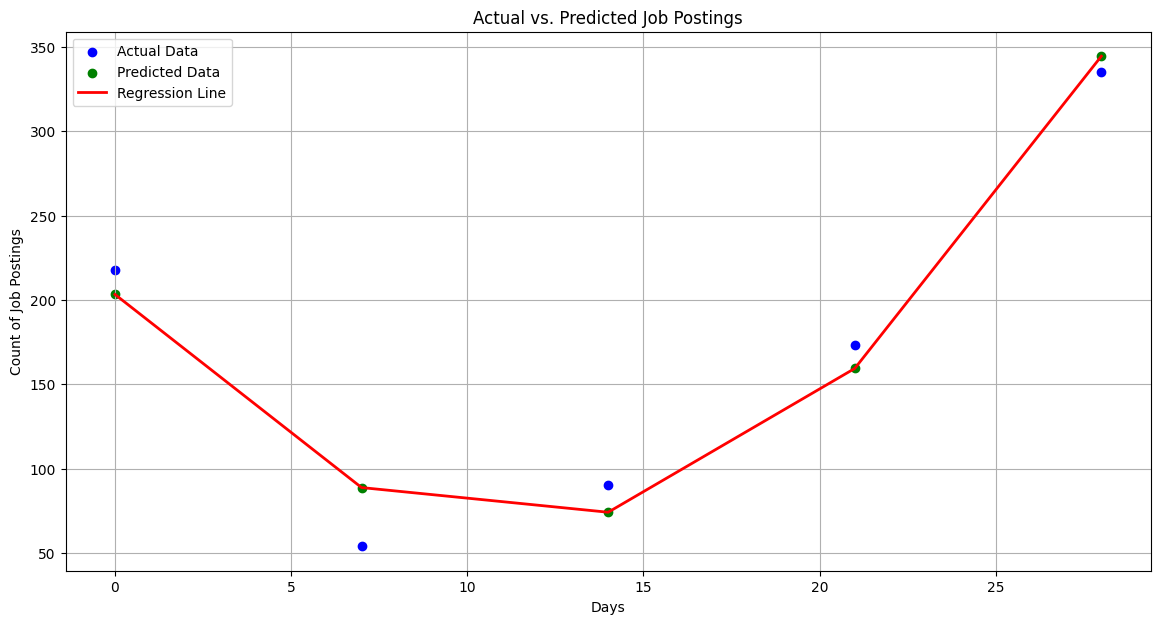

In [ ]:
#model using polynomial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the 'Days_Ago' column exists and process it
df['Days_Ago'] = df['Date'].str.extract(r'(\d+)').astype(float)
df['Posting_Date'] = pd.to_datetime('today') - pd.to_timedelta(df['Days_Ago'], unit='d')

# Group by Job Title and Posting_Date for analysis
trend_data = df.groupby([df['Posting_Date'].dt.to_period('W'), 'Job Title']).size().reset_index(name='Count')
trend_data['Posting_Date'] = trend_data['Posting_Date'].dt.to_timestamp()

# Aggregate data by date (sum of all job postings per week)
weekly_trend = trend_data.groupby('Posting_Date')['Count'].sum().reset_index()

# Add sequential days for regression
weekly_trend['Days'] = (weekly_trend['Posting_Date'] - weekly_trend['Posting_Date'].min()).dt.days

# Polynomial Regression (degree 2, you can experiment with higher degrees)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(weekly_trend[['Days']])

# Train the model
model = LinearRegression()
model.fit(X_poly, weekly_trend['Count'])

# Predict on the same data for training evaluation
weekly_trend['Predicted_Count'] = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(weekly_trend['Count'], weekly_trend['Predicted_Count'])
r2 = r2_score(weekly_trend['Count'], weekly_trend['Predicted_Count'])

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values and the regression curve
plt.figure(figsize=(14, 7))
plt.scatter(weekly_trend['Days'], weekly_trend['Count'], color='blue', label='Actual Data')
plt.scatter(weekly_trend['Days'], weekly_trend['Predicted_Count'], color='green', label='Predicted Data')
plt.plot(weekly_trend['Days'], model.predict(X_poly), color='red', linewidth=2, label='Regression Line')
plt.title('Actual vs. Predicted Job Postings')
plt.xlabel('Days')
plt.ylabel('Count of Job Postings')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: save tfidf model using pickle
import pickle

# Save the TF-IDF vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

print("TF-IDF vectorizer saved to tfidf_vectorizer.pkl")

TF-IDF vectorizer saved to tfidf_vectorizer.pkl
